In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1:
### 1. Generate two-dimensional data (x, y) using numpy.random : preferably the distribution of points is around some predefined line (y = k + b) for further analysis of the results

In [2]:
k_true = 1.5
b_true = 2

num_points = 100
x = np.random.uniform(-10, 10, num_points)
y_true = k_true * x + b_true
noise = np.random.normal(0, 2, num_points)
y = y_true + noise

### 2. Write a function that implements the least squares method to find optimal estimates of k and b

In [3]:
def least_squares_fit(x, y):
    # Обчислення середніх значень x і y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Обчислення β1 (k)
    numerator = np.sum((x - x_mean) * (y - y_mean))  # чисельник
    denominator = np.sum((x - x_mean) ** 2)         # знаменник
    k = numerator / denominator
    
    # Обчислення β0 (b)
    b = y_mean - k * x_mean
    
    return k, b


### 3. Compare the found parameters with the estimate of np.polyfit(x,y,1) (estimation of a degree 1 polynomial by the method of least squares), and with the initial parameters of the line (if any)

In [4]:
k_lsq, b_lsq = least_squares_fit(x, y)

k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print("Початкові параметри:")
print(f"  k = {k_true}, b = {b_true}")
print("\nОцінка методом найменших квадратів:")
print(f"  k = {k_lsq:}, b = {b_lsq:}")
print("\nОцінка за допомогою np.polyfit:")
print(f"  k = {k_polyfit:}, b = {b_polyfit:}")


Початкові параметри:
  k = 1.5, b = 2

Оцінка методом найменших квадратів:
  k = 1.4665928279344123, b = 1.8537812410317285

Оцінка за допомогою np.polyfit:
  k = 1.4665928279344127, b = 1.8537812410317263


### 4. Plot the found regression line estimates (yours and numpy's). If you generated input around the line, display that as well.

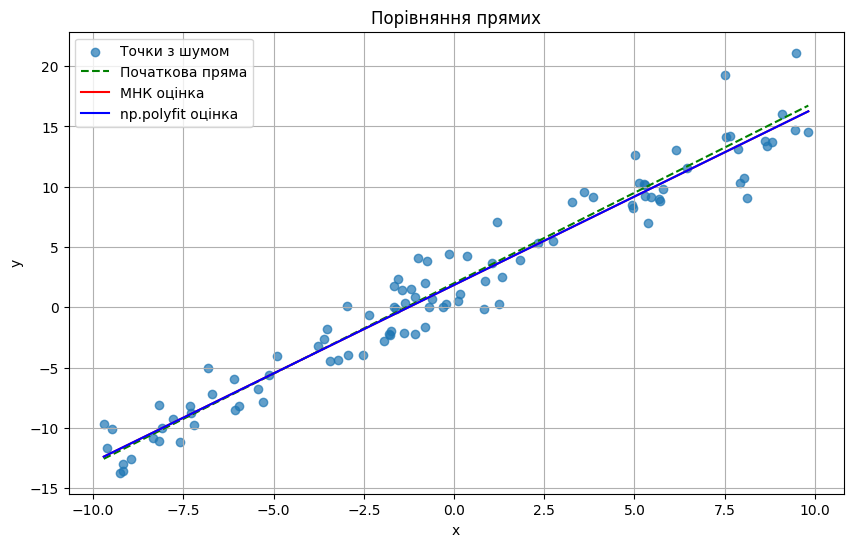

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Точки з шумом", alpha=0.7)
plt.plot(np.sort(x), k_true * np.sort(x) + b_true, color="green", linestyle="--", label="Початкова пряма")
plt.plot(np.sort(x), k_lsq * np.sort(x) + b_lsq, color="red", label="МНК оцінка")
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color="blue", label="np.polyfit оцінка")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння прямих")
plt.legend()
plt.grid(True)
plt.show()


## Task 2:
### 1. Write a function that implements the gradient descent method to find optimal estimates of k and b. Determine the optimal input parameters: learning_rate, n_iter

In [6]:
def gradient_descent(x, y, learning_rate, n_iter, eps = 0.01):
    b = 0  # початкове значення β0
    k = 0  # початкове значення β1
    n = len(y)  # кількість даних
    errors = []  # список для збереження похибок

    for i in range(n_iter):
        # Прогноз значень y на основі поточних параметрів
        y_pred = b + k * x

        # Обчислення функції втрат (MSE)
        error = np.mean(y - y_pred)
        errors.append(error)
        
        if error < eps:
            break

        # Обчислення градієнтів
        db = -2 / n * np.sum(y - y_pred)
        dk = -2 / n * np.sum(x * (y - y_pred))
        
        # Оновлення параметрів
        b_new = b - learning_rate * db
        k_new = k - learning_rate * dk

        # Оновлення параметрів
        b, k = b_new, k_new

    return b, k, errors

In [7]:
learning_rate = 0.01
n_iter = 1000
b_gd, k_gd, errors = gradient_descent(x, y, learning_rate, n_iter)


### 2. Add the obtained regression line to the general graph

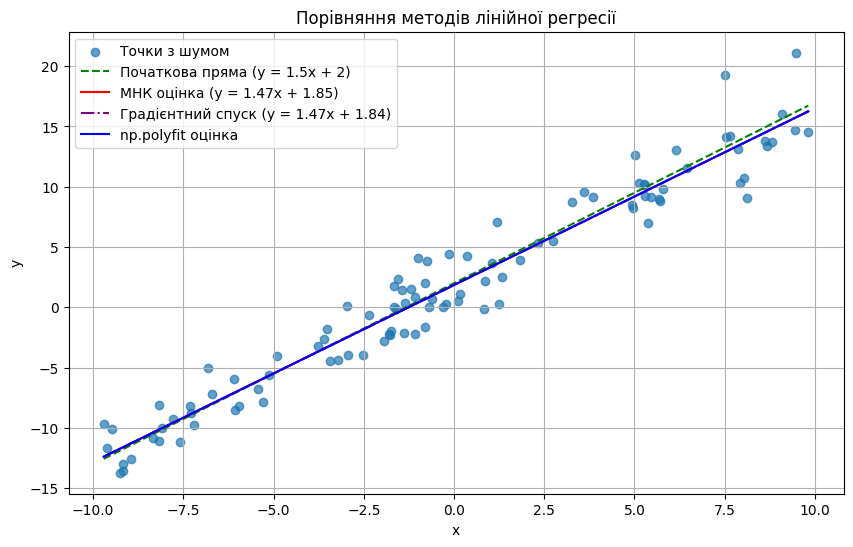

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Точки з шумом", alpha=0.7)
plt.plot(np.sort(x), k_true * np.sort(x) + b_true, color="green", linestyle="--", label="Початкова пряма (y = 1.5x + 2)")
plt.plot(np.sort(x), k_lsq * np.sort(x) + b_lsq, color="red", label=f"МНК оцінка (y = {k_lsq:.2f}x + {b_lsq:.2f})")
plt.plot(np.sort(x), k_gd * np.sort(x) + b_gd, color="purple", linestyle="-.", label=f"Градієнтний спуск (y = {k_gd:.2f}x + {b_gd:.2f})")
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color="blue", label="np.polyfit оцінка")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння методів лінійної регресії")
plt.legend()
plt.grid(True)
plt.show()

### 3. Draw a graph of the error based on the number of iterations, draw conclusions

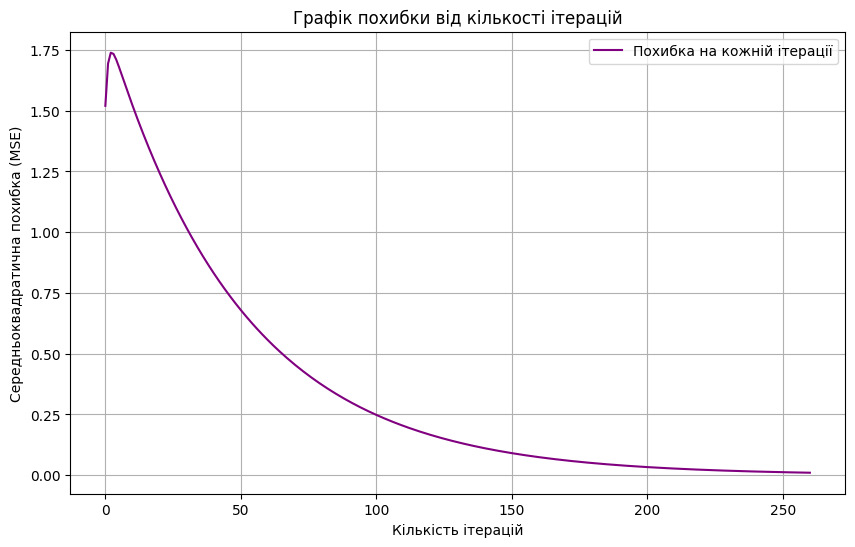

Кількість ітерацій: 261
Остаточна похибка: 0.009832859285382228


In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="Похибка на кожній ітерації", color="purple")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Середньоквадратична похибка (MSE)")
plt.title("Графік похибки від кількості ітерацій")
plt.grid(True)
plt.legend()
plt.show()

print(f"Кількість ітерацій: {len(errors)}")
print(f"Остаточна похибка: {errors[-1]:}")

### 4. Compare the obtained results with the results of the previous task

In [10]:
print("Початкові параметри:")
print(f"  k = {k_true}, b = {b_true}")
print("\nОцінка методом найменших квадратів:")
print(f"  k = {k_lsq:}, b = {b_lsq:}")
print("\nОцінка за допомогою np.polyfit:")
print(f"  k = {k_polyfit:}, b = {b_polyfit:}")
print("\nОцінка за допомогою методу градієнтного спуску:")
print(f"  k = {k_gd:}, b = {b_gd:}")

Початкові параметри:
  k = 1.5, b = 2

Оцінка методом найменших квадратів:
  k = 1.4665928279344123, b = 1.8537812410317285

Оцінка за допомогою np.polyfit:
  k = 1.4665928279344127, b = 1.8537812410317263

Оцінка за допомогою методу градієнтного спуску:
  k = 1.4665176643016866, b = 1.8439312443453786
